# Pandas

In [25]:
import pandas as pd
import numpy as np
%matplotlib inline

Function to read temporal CONVERGE files:

In [4]:
def read_temp_file(file_name):
    pd.options.mode.chained_assignment = None
    try:
        tab_ = pd.read_csv(file_name, delim_whitespace=True, skiprows=[0,1,3,4])
        tab = tab_[tab_.columns[:-1]]
        tab.columns = tab_.columns[1:]
        return tab
    except OSError as e:
        print('e.errno')


In [5]:
th = read_temp_file('thermo_region0.out')  # reading temporal file
th.head()  # print first 5 lines

,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
0,1760.0039,0.103412,0.103601,0.096541,540.23339,936.35765,373.31366,0.000103,0.000068,0.662882,1183.5114,0.0,1086.7855,798.11850,1.361684,0.000043,0.000028
1,1760.1008,0.103291,0.103503,0.096379,539.86809,934.06933,373.22070,0.000103,0.000068,0.662553,1183.5114,0.0,1086.6948,798.02768,1.361726,0.000043,0.000028
2,1760.2171,0.103146,0.103369,0.095494,539.43093,931.20807,373.10962,0.000103,0.000068,0.662160,1183.5114,0.0,1086.5868,797.91944,1.361775,0.000043,0.000028
3,1760.3136,0.103027,0.104178,0.096158,539.07105,929.43541,373.00887,0.000102,0.000068,0.661837,1183.5114,0.0,1086.4980,797.83042,1.361816,0.000043,0.000028
4,1760.4102,0.102909,0.103784,0.095325,538.71327,928.05584,372.89816,0.000102,0.000067,0.661518,1183.5114,0.0,1086.4097,797.74199,1.361856,0.000043,0.000028


To get the column 'Pressure', you can do:

In [6]:
th.Pressure.head()
# or
th['Pressure'].head()

0    0.103412
1    0.103291
2    0.103146
3    0.103027
4    0.102909
Name: Pressure, dtype: float64

If you want the columns 'Pressure' as a numpy array, use the attribute 'values'

In [7]:
th.Pressure.values

array([0.10341197, 0.10329067, 0.10314579, ..., 0.1001328 , 0.10004793,
       0.09996507])

In [8]:
# getting the list of column names
list(th)

['Crank',
 'Pressure',
 'Max_Pres',
 'Min_Pres',
 'Mean_Temp',
 'Max_Temp',
 'Min_Temp',
 'Volume',
 'Mass',
 'Density',
 'Integrated_HR',
 'HR_Rate',
 'C_p',
 'C_v',
 'Gamma',
 'Kin_Visc',
 'Dyn_Visc']

When printing the datafrage, the column on the left, here starting from 0, is the index of the dataframe. If you slice your dataframe without re-indexing, it will get sliced as well :

In [9]:
th_slice1 = th[(th.Crank > 1770)]
th_slice1.head()

,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
100,1770.0076,0.099824,0.100349,0.096300,520.00803,821.31329,372.08569,0.000076,0.000051,0.664741,1183.5114,0.0,1081.8605,793.17065,1.363969,0.000042,0.000027
101,1770.1042,0.099865,0.099981,0.096350,519.95647,821.07900,372.15413,0.000076,0.000051,0.665075,1183.5114,0.0,1081.8484,793.15837,1.363975,0.000042,0.000027
102,1770.2009,0.099906,0.100307,0.096409,519.90632,820.83313,372.22097,0.000076,0.000051,0.665412,1183.5114,0.0,1081.8368,793.14649,1.363981,0.000042,0.000027
103,1770.3169,0.099956,0.100135,0.096470,519.84752,820.52155,372.30004,0.000076,0.000050,0.665821,1183.5114,0.0,1081.8231,793.13247,1.363988,0.000042,0.000027
104,1770.4136,0.099998,0.100188,0.096541,519.80021,820.24730,372.36675,0.000075,0.000050,0.666164,1183.5114,0.0,1081.8124,793.12144,1.363993,0.000042,0.000027


So getting values from a particular line can get a bit tricky if you don't pay attention...
You can use mainly two functions : 
- loc: selects the row(s) based on the value of the dataframe index
- iloc: selects the row(s) based on their position (the first one will always be zero, not matter how sliced it was)
    

### Access a particular row by position : iloc

In [10]:
#getting the first row :
th.iloc[0]

Crank            1760.003900
Pressure            0.103412
Max_Pres            0.103601
Min_Pres            0.096541
Mean_Temp         540.233390
Max_Temp          936.357650
Min_Temp          373.313660
Volume              0.000103
Mass                0.000068
Density             0.662882
Integrated_HR    1183.511400
HR_Rate             0.000000
C_p              1086.785500
C_v               798.118500
Gamma               1.361684
Kin_Visc            0.000043
Dyn_Visc            0.000028
Name: 0, dtype: float64

In [11]:
# get the mean temperature at the beginning of the simulation
th.iloc[0].Mean_Temp
# or
# th['Mean_Temp'].iloc[0]
#th.iloc[-1].Mean_Temp  get the mean temperature at  the end of the simulation

540.23339

### Acces a particular row by label: loc

In [12]:
th_slice1.loc[100].Crank

1770.0076

In [13]:
# this is equivalent to:
th_slice1.iloc[0].Crank

1770.0076

In [14]:
# crank angle of the maximum pressure
idxMax = th.Pressure.idxmax() # idxmax returns a dataframe index, not a position!! so loc is needed
th.loc[idxMax].Crank

2165.2039

### To get data at a particular crank angle:

In [15]:
crank0 = 1770.0
th.iloc[(th['Crank']-crank0).abs().argsort()[:1]]
# this return a dataFrame

,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
100,1770.0076,0.099824,0.100349,0.0963,520.00803,821.31329,372.08569,0.000076,0.000051,0.664741,1183.5114,0.0,1081.8605,793.17065,1.363969,0.000042,0.000027


In [16]:
# turning this into a function, because it's more convenient...
def getCrank(df, crank):
    return df.iloc[(df['Crank']-crank).abs().argsort()[:1]]

In [17]:
# now, we get the mean cylinder pressure at crank=1780 CAD:
getCrank(th, 1780.0).Pressure

200    0.104252
Name: Pressure, dtype: float64

In [18]:
# imagine you need to slice your dataframe, without re-indexing:
th_slice = th[(th.Crank > 1770) & (th.Crank < 1800)]
th_slice.head()

,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
100,1770.0076,0.099824,0.100349,0.096300,520.00803,821.31329,372.08569,0.000076,0.000051,0.664741,1183.5114,0.0,1081.8605,793.17065,1.363969,0.000042,0.000027
101,1770.1042,0.099865,0.099981,0.096350,519.95647,821.07900,372.15413,0.000076,0.000051,0.665075,1183.5114,0.0,1081.8484,793.15837,1.363975,0.000042,0.000027
102,1770.2009,0.099906,0.100307,0.096409,519.90632,820.83313,372.22097,0.000076,0.000051,0.665412,1183.5114,0.0,1081.8368,793.14649,1.363981,0.000042,0.000027
103,1770.3169,0.099956,0.100135,0.096470,519.84752,820.52155,372.30004,0.000076,0.000050,0.665821,1183.5114,0.0,1081.8231,793.13247,1.363988,0.000042,0.000027
104,1770.4136,0.099998,0.100188,0.096541,519.80021,820.24730,372.36675,0.000075,0.000050,0.666164,1183.5114,0.0,1081.8124,793.12144,1.363993,0.000042,0.000027


In [19]:
# the iloc is based on position, so no matter how you sliced your dataframe, iloc[0] will always get you the first line:

c0 = th.iloc[0].Crank
c0_slice = th_slice.iloc[0].Crank

print('iloc[0]: '+str(c0))
print('iloc[0] for sliced dataframe: '+str(c0_slice))

iloc[0]: 1760.0039
iloc[0] for sliced dataframe: 1770.0076


In [20]:
# the function "getCrank" will work, even after slices without re-indexing
getCrank(th_slice, 1770.4)

,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
104,1770.4136,0.099998,0.100188,0.096541,519.80021,820.2473,372.36675,0.000075,0.00005,0.666164,1183.5114,0.0,1081.8124,793.12144,1.363993,0.000042,0.000027


### Boolean indexing

In [21]:
#Slice the table to keep crank angle beyond 1800
th[th.Crank > 1800].head()


,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
400,1800.0049,0.096068,0.096973,0.095519,491.33896,703.89478,366.35846,0.000039,0.000026,0.677121,1183.5114,0.0,1074.7093,786.01967,1.367280,0.000039,0.000026
401,1800.1047,0.096044,0.096916,0.095494,491.30243,703.48364,366.62038,0.000039,0.000026,0.677004,1183.5114,0.0,1074.6991,786.00973,1.367285,0.000039,0.000026
402,1800.2037,0.096024,0.096868,0.095418,491.26934,703.05635,366.87204,0.000039,0.000026,0.676907,1183.5114,0.0,1074.6893,786.00014,1.367289,0.000039,0.000026
403,1800.3029,0.096007,0.096866,0.095447,491.24137,702.62314,366.98363,0.000039,0.000026,0.676827,1183.5114,0.0,1074.6800,785.99120,1.367293,0.000039,0.000026
404,1800.4019,0.095993,0.096832,0.095428,491.21663,702.18596,367.12497,0.000039,0.000026,0.676764,1183.5114,0.0,1074.6712,785.98269,1.367296,0.000039,0.000026


In [22]:
# Slice the table to keep crank angle between 1800 and 1900
th[(th.Crank > 1800) & (th.Crank < 1900)].tail()

,Crank,Pressure,Max_Pres,Min_Pres,Mean_Temp,Max_Temp,Min_Temp,Volume,Mass,Density,Integrated_HR,HR_Rate,C_p,C_v,Gamma,Kin_Visc,Dyn_Visc
1395,1899.5029,0.089191,0.093475,0.084692,359.26513,493.46136,319.34866,0.000327,0.000281,0.860447,1183.5114,0.0,1027.3201,738.77251,1.390577,0.000025,0.000021
1396,1899.6099,0.089210,0.093774,0.084582,359.25598,494.00168,319.30367,0.000327,0.000281,0.860654,1183.5114,0.0,1027.3147,738.76712,1.390580,0.000025,0.000021
1397,1899.7029,0.089227,0.094111,0.084366,359.24795,494.38558,319.35438,0.000327,0.000282,0.860833,1183.5114,0.0,1027.3099,738.76243,1.390582,0.000025,0.000021
1398,1899.8100,0.089245,0.094344,0.084258,359.23872,494.96922,319.39841,0.000328,0.000282,0.861037,1183.5114,0.0,1027.3045,738.75707,1.390585,0.000025,0.000021
1399,1899.9016,0.089261,0.094607,0.083848,359.23062,495.55291,319.40707,0.000328,0.000283,0.861211,1183.5114,0.0,1027.2999,738.75245,1.390588,0.000025,0.000021


### Retrieving dataframe information

In [23]:
# maximum pressure over the cycle in bar
10*th.Pressure.max()  # th.min(), th.mean(), th.median(), th.sum()...
# or
#10*th['Pressure'].max() 

46.583987

### Plotting

Text(0, 0.5, 'Cylinder pressure (bar)')

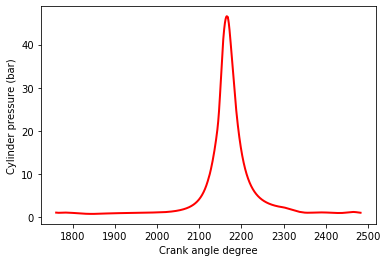

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(th.Crank,th.Pressure*10, color = 'red', linewidth = 2)
plt.xlabel('Crank angle degree')
plt.ylabel('Cylinder pressure (bar)')

### Creating a dataframe

In [27]:
import pandas as pd
import numpy as np

In [28]:
data = {'Character':['Tintin', 'Tournesol', 'Haddock', 'Milou'],\
        'Description':['Journalist', 'Researcher', 'Captain', 'Dog'],\
       'Ref':[1,2,3,4]}

In [29]:
df = pd.DataFrame.from_dict(data) # creating the dataframe from a dictionary
df

,Character,Description,Ref
0,Tintin,Journalist,1
1,Tournesol,Researcher,2
2,Haddock,Captain,3
3,Milou,Dog,4


In [30]:
df['Character']

0       Tintin
1    Tournesol
2      Haddock
3        Milou
Name: Character, dtype: object

In [31]:
df.iloc[-1].Description

'Dog'

### Creating a dataframe from a numpy array

In [32]:
d = np.array([[1, 2, 3], [4, 5, 6]])
df_np = pd.DataFrame(d, columns=['A', 'B', 'C'])
print(df_np)

   A  B  C
0  1  2  3
1  4  5  6


### Copying a selection of column and creating a new dataframe

In [33]:
df_np2 = df_np[['A', 'B']].copy()
df_np2

,A,B
0,1,2
1,4,5


### Modifying columns name

In [34]:
df = df.rename(columns={"Ref": "Id"})
df.head()

,Character,Description,Id
0,Tintin,Journalist,1
1,Tournesol,Researcher,2
2,Haddock,Captain,3
3,Milou,Dog,4


In [35]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['character', 'description', 'id'], dtype='object')

### Merging / Concatenating

We just provide here some very basic examples. For more details :
https://pandas.pydata.org/pandas-docs/stable/merging.html

In [36]:
data1 = {'Character':['Tintin', 'Tournesol', 'Haddock', 'Milou'], 'Ref':[1, 2, 3, 4]}
data2 = {'Description':['Journalist', 'Researcher', 'Captain', 'Dog'], 'Ref':[1, 2, 3, 4]}

df1 = pd.DataFrame.from_dict(data1)
df2 = pd.DataFrame.from_dict(data2)

In [37]:
df1

,Character,Ref
0,Tintin,1
1,Tournesol,2
2,Haddock,3
3,Milou,4


In [38]:
df2

,Description,Ref
0,Journalist,1
1,Researcher,2
2,Captain,3
3,Dog,4


In [39]:
pd.merge(df1, df2)

,Character,Ref,Description
0,Tintin,1,Journalist
1,Tournesol,2,Researcher
2,Haddock,3,Captain
3,Milou,4,Dog


In [40]:
data3 = {'Character':['Tintin', 'Tournesol'],\
         'Description':['Journalist', 'Researcher'],\
          'Ref':[1, 2]}
data4 = {'Character':['Haddock', 'Milou'],\
         'Description':['Captain', 'Dog'],\
          'Ref':[3, 4]}

df3 = pd.DataFrame.from_dict(data3)
df4 = pd.DataFrame.from_dict(data4)

In [41]:
dfconc = pd.concat([df3, df4]) # horizontal concatenation
dfconc

,Character,Description,Ref
0,Tintin,Journalist,1
1,Tournesol,Researcher,2
0,Haddock,Captain,3
1,Milou,Dog,4


In [42]:
dfconc = dfconc.reset_index(drop=True)
dfconc

,Character,Description,Ref
0,Tintin,Journalist,1
1,Tournesol,Researcher,2
2,Haddock,Captain,3
3,Milou,Dog,4


For a bit more complex merging...

In [43]:
data5 = {'Crank':[-5, -4, -3], 'Pressure':[10, 20, 30], 'equ_ratio':[1.2,1.3,1.4]}
data6 = {'Crank':[-2, -1, 0], 'Pressure':[40, 50, 60]}

df5 = pd.DataFrame.from_dict(data5)
df6 = pd.DataFrame.from_dict(data6)

In [44]:
df5

,Crank,Pressure,equ_ratio
0,-5,10,1.2
1,-4,20,1.3
2,-3,30,1.4


In [45]:
df6

,Crank,Pressure
0,-2,40
1,-1,50
2,0,60


In [46]:
df_merge = pd.merge(df6, df5, how='outer')
df_merge

,Crank,Pressure,equ_ratio
0,-2,40,NaN
1,-1,50,NaN
2,0,60,NaN
3,-5,10,1.2
4,-4,20,1.3
5,-3,30,1.4


In [47]:
df_merge = df_merge.sort_values('Crank', ascending=True)
df_merge = df_merge.reset_index(drop=True)

In [48]:
df_merge

,Crank,Pressure,equ_ratio
0,-5,10,1.2
1,-4,20,1.3
2,-3,30,1.4
3,-2,40,NaN
4,-1,50,NaN
5,0,60,NaN


In [49]:
# replacing all NaNs by zero
df_merge = df_merge.fillna(0)
df_merge

,Crank,Pressure,equ_ratio
0,-5,10,1.2
1,-4,20,1.3
2,-3,30,1.4
3,-2,40,0.0
4,-1,50,0.0
5,0,60,0.0


### Dropping a column

In [50]:
df_merge = df_merge.drop('Pressure', axis=1)

### Dropping a row by index

In [51]:
df_merge = df_merge.drop(df_merge.index[0])
df_merge

,Crank,equ_ratio
1,-4,1.3
2,-3,1.4
3,-2,0.0
4,-1,0.0
5,0,0.0


In [52]:
# reindexing
df_merge.reset_index(drop=True)

,Crank,equ_ratio
0,-4,1.3
1,-3,1.4
2,-2,0.0
3,-1,0.0
4,0,0.0


### Writing a dataframe as a csv file

In [53]:
import sys

In [54]:
data = {'Character':['Tintin', 'Tournesol', 'Haddock', 'Milou'],\
        'Description':['Journalist', 'Researcher', 'Captain', 'Dog'],\
       'Ref':[1,2,3,4]}
df = pd.DataFrame.from_dict(data)

By default, the separator is a comma and the index is written

In [55]:
df.to_csv(sys.stdout)

,Character,Description,Ref
0,Tintin,Journalist,1
1,Tournesol,Researcher,2
2,Haddock,Captain,3
3,Milou,Dog,4


In [56]:
# with a different separator and removing the index
_sep = '\t'
df.to_csv(sys.stdout, sep=_sep, index=False) # replace sys.stdout by the name of your file

Character	Description	Ref
Tintin	Journalist	1
Tournesol	Researcher	2
Haddock	Captain	3
Milou	Dog	4


If you want to impose a particular header with a few lines, well, not so easy... Write first the header of your file, then the rest of the csv with the data.

In [57]:
with open('test.csv', 'w') as f:
    f.write('# '+_sep.join([h for h in df.columns])+'\n#\n#\n')
    
df.to_csv('test.csv', sep='\t', index=False, header=False, mode='a')